# 10 plotting libraries

Review of plotting libraries.

[Xavier Dupré](http://www.xavierdupre.fr/)

``xavier.dupre AT gmail.com``

Senior Engineer at **Microsoft France** on [Azure ML](https://azure.microsoft.com/fr-fr/services/machine-learning/), **Teacher in Computer Science** at the [ENSAE](http://www.ensae.fr/)

![Azure ML](logo_azureml.png) ![ENSAE](ENSAE_logo_developpe.jpg)

**Objectives of this talk**

Nobody makes plot without an existing library anymore. 

* How to choose a plotting library ?
* List of available options
* How to extend an existing library ?
* How to wrap a javascript library ?

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(last_level=2)

**Material**

* Notebooks for this talk: [http://www.xavierdupre.fr/...](http://www.xavierdupre.fr/app/jupytalk/helpsphinx/2016/pydata2016.html)
* Azure ML: [Introducing Jupyter Notebooks in Azure ML Studio](https://blogs.technet.microsoft.com/machinelearning/2015/07/24/introducing-jupyter-notebooks-in-azure-ml-studio/)
* Teachings at ENSAE: [Python pour un Data Scientist](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/td_2a.html)

**Microsoft, Python and Open Source**

* 2014/11: [.NET Core is Open Source](https://blogs.msdn.microsoft.com/dotnet/2014/11/12/net-core-is-open-source/)
* 2015/07: [Introducing Jupyter Notebooks in Azure ML Studio](https://blogs.technet.microsoft.com/machinelearning/2015/07/24/introducing-jupyter-notebooks-in-azure-ml-studio/)
* 2015/07: [Python Tools for Visual Studio](https://microsoft.github.io/PTVS/) moves to Github
* 2016/02: [Creating web apps with Flask in Azure](https://azure.microsoft.com/en-us/documentation/articles/web-sites-python-create-deploy-flask-app/)
* 2016/06: [Build Machine Learning applications to run on Apache Spark clusters on HDInsight Linux](https://azure.microsoft.com/en-us/documentation/articles/hdinsight-apache-spark-ipython-notebook-machine-learning/)
* 2016/06: [azure-sdk-python 2.0.rc4](https://github.com/Azure/azure-sdk-for-python): Python interface to access Azure services

![ptvs](img_ptvs.png)

**Microsoft in Data Science**

* [Developing the Next Wave of Data Scientists](https://blogs.technet.microsoft.com/machinelearning/2016/06/14/developing-the-next-wave-of-data-scientists/)
* Microsoft is one of the sponsors of the [DataScienceGame](http://www.datasciencegame.com/sponsors)

[![Microsoft - ENSAE - Hackathon](img_hack.png)](https://www.youtube.com/embed/Y1UKAbbExn8)



## Elements of decision

In [2]:
add_notebook_menu(keep_item=0)

### Graph language

We like them because we read them faster.

In [3]:
%matplotlib inline

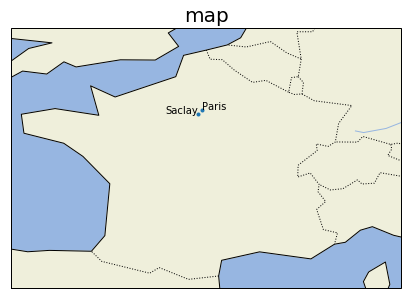

In [4]:
from jupytalk.talk_examples.pydata2016 import example_cartopy
ax = example_cartopy()
ax.set_title("map", size=20);

Text(0.5,1,'outlier')

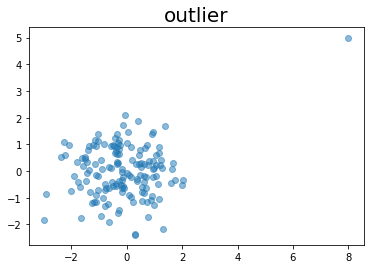

In [5]:
import numpy, matplotlib.pyplot as plt
N = 150
x, y = numpy.random.normal(0, 1, N), numpy.random.normal(0, 1, N)
x[-1], y[-1] = 8, 5
plt.scatter(x, y, alpha=0.5)
plt.title("outlier", size=20)

Text(0.5,1,'correlation')

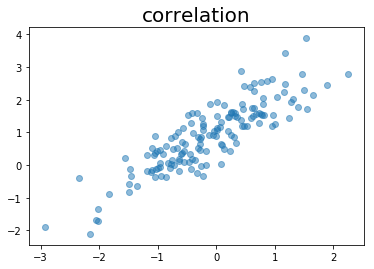

In [6]:
import numpy, matplotlib.pyplot as plt
N = 150
x = numpy.random.normal(0, 1, N)
y = x + numpy.random.normal(0, 0.5, N) + 1
plt.scatter(x, y, alpha=0.5)
plt.title("correlation", size=20)

Text(0.5,1,'incertainty')

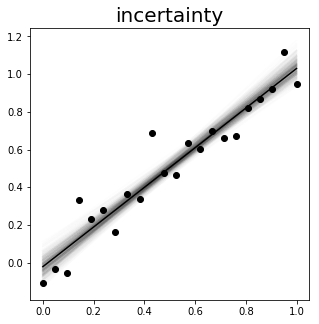

In [7]:
from jupytalk.talk_examples.pydata2016 import example_confidence_interval
ax = example_confidence_interval()
# https://github.com/sdpython/jupytalk/blob/master/src/jupytalk/talk_examples/pydata2016.py
ax.set_title("incertainty", size=20)

Text(0.5,1,'network')

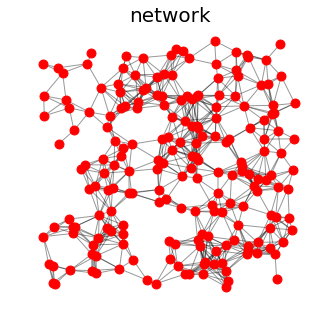

In [8]:
from jupytalk.talk_examples.pydata2016 import example_networkx
ax = example_networkx()
# https://github.com/sdpython/jupytalk/blob/master/src/jupytalk/talk_examples/pydata2016.py
ax.set_title("network", size=20)

### Why so many?

* Every domain has its own data representation (statistics, machine learning, biology, maps...)
* Many supports (images, web sites, notebooks)
* High volume of data requires specific solution (maps)

### Example: seaborn

[seaborn](https://web.stanford.edu/~mwaskom/software/seaborn/index.html)

* collection of plots used for any new projects
* See [regplot](https://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.regplot.html#seaborn.regplot).

c:\python370_x64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'regplot')

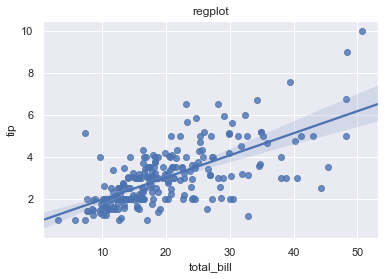

In [9]:
import seaborn; seaborn.set(color_codes=True)
tips = seaborn.load_dataset("tips")
ax = seaborn.regplot(x="total_bill", y="tip", data=tips)
ax.set_title("regplot")

### Why using a programming language to plot?

Justification | Case
--------------|-----
**automate** complex graph | **update** a presentation
**share** customized graph | easier to read among a team, build a common **graph language**
**combine** data processing and plotting | handle **huge volume** of data


### What did Internet change?

* **Remote access:** interact with the graph cheaper than drawing again
* Many plotting libraries: [javascript plotting libraries](https://www.bing.com/search?q=javascript+plotting+libraries&FORM=AWRE)
* [20 best JavaScript charting libraries](http://thenextweb.com/dd/2015/06/12/20-best-javascript-chart-libraries/#gref)

### Impact of notebook on Python

* **Before:** graphs libraries were **mostly static** (images)
* **After:** graphs are now **interactive**
* Notebook can easily leverage javascript libraries

### Decisions

**Decision 1: the audience?**

* The plot is just for you?
* The plot will be inserted in a report? In a PowerPoint presentation?
* The plot will be internally shared?
* The plot will be shared with customers on a website?

**Decision 2: which volume of data to plot?**

* How many points to draw 10.000, 1M, 1B?
* How fast do you need to draw?
* Do you need to preprocess the data?

**Decision 3: which technology?**

* **static** *(image, PDF, no zoom)*
    * [matplotlib](http://matplotlib.org/) based
    * [reportlab](http://www.reportlab.com/) based
    * [Pillow](https://pillow.readthedocs.io/en/) based
* **interactive** *(zoom, move, not always great in a book)*
    * javascript based
    * Python and javascript based
* **pure javascript** *(if you don't find what you want)*
    * from a notebook
    * from a web page

**Final check: is the library maintained?**

* License: is it free only for research?
* Source are available on github: is the last commit recent?
* The library was mentioned in a conference.
* The library is used by many others to create customized graphs?
* It works on many platforms.
* The documentation is great.

## - Libraries for static plots

In [10]:
add_notebook_menu(keep_item=1)

### Static never fails

* Images works anywhere
* Images are self contained
* Easy to combine

![combine](img_combine.png)

### Five steps to plot

1. Create a **figure**: pixel system.
2. Create **Axis**: coordinate system.
3. Draw **inside** the plotting area
4. Add element **outside** the plotting area
5. **Render** the image.

![step5](img_step5.png)

#### matplotlib for all

[matplotlib](http://matplotlib.org/): the standard

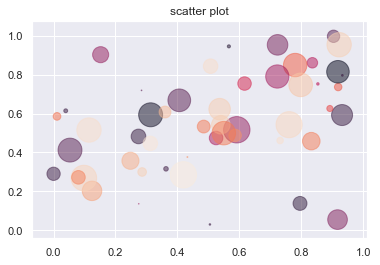

In [11]:
import numpy as np, matplotlib.pyplot as plt
N = 50
x, y, colors = np.random.rand(N), np.random.rand(N), np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2
fig, ax = plt.subplots()                       # steps 1, 2
ax.scatter(x, y, s=area, c=colors, alpha=0.5)  # step 3
ax.set_title("scatter plot")                   # step 4
fig.savefig("example_scatterplot.png")         # step 5

#### networkx for networks

[networkx](https://networkx.github.io/documentation/networkx-1.9.1/index.html)

![networkx](img_networkx.png)

#### seaborn for statistics

[seaborn](https://web.stanford.edu/~mwaskom/software/seaborn/)

![seaborn](img_seaborn.png)

#### basemap for maps

[basemap](http://matplotlib.org/basemap/) | .
------------------------------------------|--
![basemap](img_basemap.png) | ![basemap2](img_basemap2.png)

See also [cartopy](https://github.com/SciTools/cartopy)

#### ete3 for trees

[ete3](http://etetoolkit.org/)

![ete3](img_ete3.png)

#### reportlab for pdf

[reportlab](http://www.reportlab.com/): standard for PDF

![reprotlab](img_reportlab.png)

#### plotnine for the syntax

[plotnine](https://github.com/has2k1/plotnine)

![plotnine](img_ggplot_code.png)

![plotnine](img_ggplot.png)

#### missingno for the missing values

[missingno](https://github.com/ResidentMario/missingno)

![missingno](img_missingno.png)

#### biopython for genes

[biopython](http://biopython.org/wiki/Biopython)

![biopyhon](img_biopython.png)

#### lifelines for survival analysis

[lifelines](http://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html)

![lifelines](img_lifelines.png)

### In short

* Many libraries available in many domains.
* Many scripts available (github, stackoverflow)
* Look for the gallery.
* Pick the closest graph to your needs
* Tweak

## - Libraries for interactivity

In [12]:
add_notebook_menu(keep_item=2)

### Interactivity is javascript

* A browser is needed
* A server might be needed (bqplot)
* Better to know javascript

### Steps to plot

1. Create a figure: 
2. Create Axis: coordinate system
3. Draw inside the plotting area
4. Add elements outside the plotting area
5. **Implement interactivity if not automated**
6. Write the corresponding HTML, Javascript code

#### bokeh for all

[bokeh](http://bokeh.pydata.org/) **default interactivity:** zoom, move, reset ; **custom** python, javascript

![bokeh](img_bokeh.png)

#### plotly for its design 

[plotly](https://plot.ly/) **default interactivity:** zoom, move, reset, text popup ; **plus** integration with pandas

![plotly](img_plotly.png)

#### mpld3 for matplotlib

[mpld3](http://mpld3.github.io/) = matplotlib in javascript **default interactivity:** zoom, move, reset **custom** python, javascript (simple)

![mpld3](img_mpld3.png)

#### python-lightning for its simplicity

[python-lightning](http://lightning-viz.org/) also works with R **default interactivity:** zoom, move, reset, text popup

![lightning](img_lightning2.png)

#### pygal, leather for SVG

[pygal](http://www.pygal.org/en/stable/) [leather](http://leather.readthedocs.io/en/latest/index.html) **default interactivity:** text popup

![pygal](img_pygal.png)

#### vega for its simplicity

[vega](https://github.com/vega/ipyvega) **default interactivity:** text popup

![vega](img_vega2.png)

#### folium for maps

[folium](http://folium.readthedocs.io/en/latest/) = map with [OpenStreetMap](https://www.openstreetmap.org/) **default interactivity:** zoom, move, reset **custom** text popup, marker

In [13]:
import folium
center = [48.862, 2.346]
paris = folium.Map(center, zoom_start=13)
folium.Marker(center, popup='Les Halles').add_to(paris)
paris

#### pythreejs for 3D

[pythreejs](https://github.com/jovyan/pythreejs) **default interactivity:** zoom, move, rotate, reset

![pythreejs](screencast.gif)

#### pydy for mechanics

[pydy](http://pydy.readthedocs.io/en/stable/index.html) **default interactivity:** visualize a scene

![pydy](img_pydy.png)

### In short

Are you looking for?

* Standard interactivity (all of them)
* Custom interactivity (Python, Javascript) (bokeh)
* Easy export to websites (SVG, vega)

## - Libraries mixing Javascript, Python, ...

In [14]:
add_notebook_menu(keep_item=3)

### Hide the complexity

* Mix of technologies
* Wrapped in one module
* Easy examples
* But cryptic bugs for newbies

#### bqplot for the interactions in python

[bqplot](https://github.com/bloomberg/bqplot)

![bqplot](img_bqplot.png)

#### brython, bythonmagic to avoid javascript

Magic command ``%%brython%%``

* easy to modify the notebook with Python
* no javascript
* place to start if you don't like javascript

![brython](img_brython.png)

#### geoplotlib for maps in a GUI

[geoplotlib](https://github.com/andrea-cuttone/geoplotlib)

![geoplotlib](img_geoplotlib.png)

#### vispy for computational graphics

[http://vispy.org/installation.html](vispy) creates graphs demanding heavy computation. It requires the knowledge of C++.

![vispy](img_vispy_mandelbrot.png)

### In short

* Very suitable for research purpose
* Uneasy to export the results

## - Libraries for high volume of data

In [15]:
add_notebook_menu(keep_item=4)

### Challenge

Two extremes:

* Plotting huge volume takes time to process
* Interactivity requires fast processing

Compromise?

### + datashader

[datashader](https://github.com/bokeh/datashader) = bokeh + Python interaction + data interpolation

![datashader](img_datashader.png)

### In short

Work in progress.

## Deeper into programming

In [16]:
add_notebook_menu(keep_item=5)

### Extend an existing library

* Follow existing design
* Constraints:

    * Add the plot to an existing one
    * Add complementery elements

#### Wrong design

![wrong](img_wrong2.png)

#### Right design

![right](img_right.png)

#### Parameter ``ax``

![subplots](img_subplots.png)

### Wrapping a javascript library

* Chosen from [10 JavaScript libraries to draw your own diagrams](http://modeling-languages.com/javascript-drawing-libraries-diagrams/)
* Search for ``python + <library>``
* [JoinJS](http://jointjs.com/demos/charts)
* [ChartJS](http://www.chartjs.org/docs/)


#### Dummy example with treant

* [treant-js](http://fperucic.github.io/treant-js/): [tennis draw](http://fperucic.github.io/treant-js/examples/tennis-draw/)
* [notebook](http://www.xavierdupre.fr/app/jupytalk/helpsphinx/_downloads/jsonly_treant.html)
* [code](https://github.com/sdpython/jupytalk/blob/master/src/jupytalk/talk_examples/treant_wrapper.py)

![treant](img_treant.png)

#### Part 1: HTML

* a DIV with an id
* a script for the library

![html](img_thtml.png)

#### Part 2: Json data

* JSON most of the time

![json](img_tdata.png)

#### Part 3: javascript

![js](img_tjs2.png)

### In short

* Pratice with existing libraries first
* Think about others users

## Conclusion

* Static images are not obsolete!
* Interactivity still requires a bit of work.
* Huge volume of data is still a work in progress
* Easy to create your own library

**Un bon croquis vaut mieux qu’un long discours.** *Napoléon Bonaparte*


**This is only the beginning**

*Thank you*

* http://www.xavierdupre.fr/
* ``xavier.dupre AT gmail.com``